In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
df_train = pd.read_csv('./data/train_trees.csv')
hdb_train = df_train.copy()
df_test = pd.read_csv('./data/test_trees.csv')
hdb_test = df_test.copy()

In [5]:
# Categorical Enumeration

housing = hdb_train.copy()
housing_codes = housing.copy()
d = {}

housing['town'] = housing['town'].astype('category')
d['town'] = dict(enumerate(housing['town'].cat.categories))
housing_codes['town'] = housing['town'].cat.codes
housing_codes['town_reversed'] = housing_codes['town'].map(d['town'])

housing['block'] = housing['block'].astype('category')
d['block'] = dict(enumerate(housing['block'].cat.categories))
housing_codes['block'] = housing['block'].cat.codes
housing_codes['block_reversed'] = housing_codes['block'].map(d['block'])

housing['street_name'] = housing['street_name'].astype('category')
d['street_name'] = dict(enumerate(housing['street_name'].cat.categories))
housing_codes['street_name'] = housing['street_name'].cat.codes
housing_codes['street_name_reversed'] = housing_codes['street_name'].map(d['street_name'])

housing['flat_type'] = housing['flat_type'].astype('category')
d['flat_type'] = dict(enumerate(housing['flat_type'].cat.categories))
housing_codes['flat_type'] = housing['flat_type'].cat.codes
housing_codes['flat_type_reversed'] = housing_codes['flat_type'].map(d['flat_type'])

housing['flat_model'] = housing['flat_model'].astype('category')
d['flat_model'] = dict(enumerate(housing['flat_model'].cat.categories))
housing_codes['flat_model'] = housing['flat_model'].cat.codes
housing_codes['flat_model_reversed'] = housing_codes['flat_model'].map(d['flat_model'])

housing['subzone'] = housing['subzone'].astype('category')
d['subzone'] = dict(enumerate(housing['subzone'].cat.categories))
housing_codes['subzone'] = housing['subzone'].cat.codes
housing_codes['subzone_reversed'] = housing_codes['subzone'].map(d['subzone'])

housing['planning_area'] = housing['planning_area'].astype('category')
d['planning_area'] = dict(enumerate(housing['planning_area'].cat.categories))
housing_codes['planning_area'] = housing['planning_area'].cat.codes
housing_codes['planning_area_reversed'] = housing_codes['planning_area'].map(d['planning_area'])

housing['region'] = housing['region'].astype('category')
d['region'] = dict(enumerate(housing['region'].cat.categories))
housing_codes['region'] = housing['region'].cat.codes
housing_codes['region_reversed'] = housing_codes['region'].map(d['region'])

housing_codes

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,...,shortest_ex_mrt,shortest_pl_mrt,town_reversed,block_reversed,street_name_reversed,flat_type_reversed,flat_model_reversed,subzone_reversed,planning_area_reversed,region_reversed
0,2021-09-01,12,545,239,1,10,67.0,yes,1983-01-01,1.344518,...,0.699127,0.699127,jurong east,257,Jurong East Street 24,3 room,new generation,yuhua east,jurong east,west region
1,2022-05-01,1,86,577,2,10,92.0,yes,1978-01-01,1.330186,...,0.898991,0.898991,bedok,119,bedok north road,4 room,new generation,bedok north,bedok,east region
2,2022-10-01,23,184,827,1,5,67.0,yes,1971-01-01,1.332242,...,0.218603,0.218603,toa payoh,157,lorong 1 toa payoh,3 room,improved,toa payoh central,toa payoh,central region
3,2021-08-01,16,529,328,4,3,149.0,yes,1993-01-01,1.370239,...,1.546040,1.546040,pasir ris,250,Pasir Ris Street 21,executive,apartment,pasir ris drive,pasir ris,east region
4,2022-11-01,14,939,475,1,5,68.0,yes,1972-01-01,1.320502,...,0.187856,0.187856,kallang/whampoa,34,Whampoa West,3 room,improved,bendemeer,kallang,central region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59722,2021-09-01,0,1194,12,1,10,67.0,yes,1979-01-01,1.366050,...,0.670095,0.670095,ang mo kio,441,Ang Mo Kio Avenue 10,3 room,new generation,chong boon,ang mo kio,north-east region
59723,2023-04-01,4,2483,727,2,7,83.0,yes,2019-01-01,1.286493,...,0.619569,0.619569,bukit merah,95a,henderson road,4 room,model a,henderson hill,bukit merah,central region
59724,2022-06-01,22,2308,980,3,5,122.0,yes,1988-01-01,1.355064,...,0.722926,0.722926,tampines,862a,tampines street 83,5 room,improved,tampines west,tampines,east region
59725,2023-01-01,1,1875,47,3,15,123.0,yes,1977-01-01,1.318974,...,0.923539,0.923539,bedok,67,Bedok Sth Avenue 3,5 room,standard,bedok south,bedok,east region


In [6]:
# Categorical Enumeration

housing_test = hdb_test.copy()
housing_test_codes = housing_test.copy() #[['rent_approval_date','floor_area_sqm','lease_commence_date','latitude','longitude','monthly_rent']]


d = {}

housing_test['town'] = housing_test['town'].astype('category')
d['town'] = dict(enumerate(housing_test['town'].cat.categories))
housing_test_codes['town'] = housing_test['town'].cat.codes
housing_test_codes['town_reversed'] = housing_test_codes['town'].map(d['town'])

housing_test['block'] = housing_test['block'].astype('category')
d['block'] = dict(enumerate(housing_test['block'].cat.categories))
housing_test_codes['block'] = housing_test['block'].cat.codes
housing_test_codes['block_reversed'] = housing_test_codes['block'].map(d['block'])

housing_test['street_name'] = housing_test['street_name'].astype('category')
d['street_name'] = dict(enumerate(housing_test['street_name'].cat.categories))
housing_test_codes['street_name'] = housing_test['street_name'].cat.codes
housing_test_codes['street_name_reversed'] = housing_test_codes['street_name'].map(d['street_name'])

housing_test['flat_type'] = housing_test['flat_type'].astype('category')
d['flat_type'] = dict(enumerate(housing_test['flat_type'].cat.categories))
housing_test_codes['flat_type'] = housing_test['flat_type'].cat.codes
housing_test_codes['flat_type_reversed'] = housing_test_codes['flat_type'].map(d['flat_type'])

housing_test['flat_model'] = housing_test['flat_model'].astype('category')
d['flat_model'] = dict(enumerate(housing_test['flat_model'].cat.categories))
housing_test_codes['flat_model'] = housing_test['flat_model'].cat.codes
housing_test_codes['flat_model_reversed'] = housing_test_codes['flat_model'].map(d['flat_model'])

housing_test['subzone'] = housing_test['subzone'].astype('category')
d['subzone'] = dict(enumerate(housing_test['subzone'].cat.categories))
housing_test_codes['subzone'] = housing_test['subzone'].cat.codes
housing_test_codes['subzone_reversed'] = housing_test_codes['subzone'].map(d['subzone'])

housing_test['planning_area'] = housing_test['planning_area'].astype('category')
d['planning_area'] = dict(enumerate(housing_test['planning_area'].cat.categories))
housing_test_codes['planning_area'] = housing_test['planning_area'].cat.codes
housing_test_codes['planning_area_reversed'] = housing_test_codes['planning_area'].map(d['planning_area'])

housing_test['region'] = housing_test['region'].astype('category')
d['region'] = dict(enumerate(housing_test['region'].cat.categories))
housing_test_codes['region'] = housing_test['region'].cat.codes
housing_test_codes['region_reversed'] = housing_test_codes['region'].map(d['region'])

housing_test_codes

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,...,shortest_ex_mrt,shortest_pl_mrt,town_reversed,block_reversed,street_name_reversed,flat_type_reversed,flat_model_reversed,subzone_reversed,planning_area_reversed,region_reversed
0,2023-01-01,11,506,730,7,4,121.0,yes,1984-01-01,1.358411,...,0.820333,0.820333,hougang,245,hougang street 22,5-room,improved,lorong ah soo,hougang,north-east region
1,2022-09-01,19,812,896,5,6,100.0,yes,1999-01-01,1.446343,...,0.307784,0.307784,sembawang,316,sembawang vista,4-room,model a,sembawang central,sembawang,north region
2,2023-07-01,9,1943,137,5,9,91.0,yes,1980-01-01,1.305719,...,1.097689,1.097689,clementi,708,Clementi West Street 2,4-room,new generation,clementi west,clementi,west region
3,2021-08-01,12,935,235,2,6,74.0,yes,1986-01-01,1.344832,...,0.362810,0.362810,jurong east,351,Jurong East Street 31,3 room,model a,yuhua west,jurong east,west region
4,2022-03-01,12,759,768,7,4,121.0,yes,1983-01-01,1.345437,...,0.448980,0.448980,jurong east,305,jurong east street 32,5-room,improved,yuhua west,jurong east,west region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2022-08-01,17,1612,691,5,6,92.0,yes,2012-01-01,1.403746,...,0.874360,0.874360,punggol,615b,edgefield plains,4-room,model a,waterway east,punggol,north-east region
29996,2023-02-01,19,1298,530,5,6,90.0,yes,2004-01-01,1.456113,...,0.832697,0.832697,sembawang,491,admiralty link,4-room,model a,sembawang north,sembawang,north region
29997,2023-05-01,0,1439,544,3,9,68.0,yes,1980-01-01,1.373378,...,0.544804,0.544804,ang mo kio,524,ang mo kio avenue 5,3-room,new generation,cheng san,ang mo kio,north-east region
29998,2023-02-01,24,1734,1024,8,5,144.0,yes,1998-01-01,1.436986,...,0.444509,0.444509,woodlands,656,woodlands ring road,executive,maisonette,woodlands east,woodlands,north region


In [ ]:
# KNN Model

# Preprocess the data
x_col = ['flat_type', 'region', 'num_top_sch_2km', 'num_top_sch_1km', 'num_good_sch_1km', 'num_good_sch_2km', 'num_normal_sch_1km', 'num_normal_sch_2km', 'age', 'floor_area_sqm', 'shortest_dist_school', 'shortest_dist_mall', 'shortest_ex_mrt', 'shortest_pl_mrt', 'sti', 'coe', 'subzone', 'flat_model', 'town', 'block', 'street_name', 'region', 'planning_area']
# x_col = ['flat_type', 'region', 'age', 'floor_area_sqm', 'shortest_dist_school', 'shortest_dist_mall', 'shortest_ex_mrt', 'shortest_pl_mrt', 'sti', 'coe']
# x_col = ['flat_type', 'region', 'age', 'floor_area_sqm', 'shortest_dist_mall', 'coe']
y_col = ['monthly_rent']


X_train = housing_codes[x_col].values
Y_train = housing_codes[y_col].values
X_test = housing_test_codes[x_col].values

# X = housing_codes[x_col].values
# Y = housing_codes[y_col].values
# test_size = 0.20
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN model
knn = KNeighborsRegressor(n_neighbors=25)  # You can experiment with different values of K

# Train the KNN model
knn.fit(X_train, Y_train)

# Predict prices
Y_pred = knn.predict(X_test)

# # Evaluate the model
# rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
# r2 = r2_score(Y_test, Y_pred)
# print(f"Root Mean Squared Error: {rmse}")
# print(f"R-squared (R2) Score: {r2}")

flattened_predictions = [item for sublist in Y_pred for item in sublist]
# Create a DataFrame with 'Id' and 'Predicted' columns
predictions_df = pd.DataFrame({'Id': range(0, len(flattened_predictions)), 'Predicted': flattened_predictions})
# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)


538.5734211311308 23


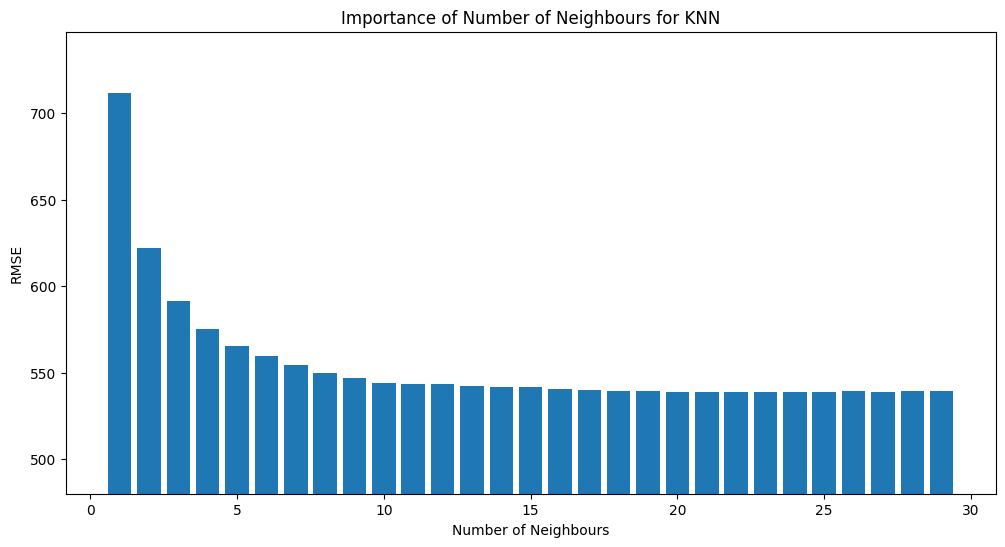

In [8]:
# KNN: Finding optimal value for K

x_col = ['flat_type', 'region', 'num_top_sch_2km', 'num_top_sch_1km', 'num_good_sch_1km', 'num_good_sch_2km', 'num_normal_sch_1km', 'num_normal_sch_2km', 'age', 'floor_area_sqm', 'shortest_dist_school', 'shortest_dist_mall', 'shortest_ex_mrt', 'shortest_pl_mrt', 'sti', 'coe', 'subzone', 'flat_model', 'town', 'block', 'street_name', 'region', 'planning_area']
y_col = ['monthly_rent']

X = housing_codes[x_col].values
Y = housing_codes[y_col].values
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Hyperparameter tuning: Try different values of n_neighbors
rmse_list = []
for k in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    rmse_list.append(rmse)

no_neighbours = [i for i in range(1, 30)]
print(min(rmse_list), rmse_list.index(min(rmse_list)))

# Create a bar chart to visualize RMSE for different number of neighbours
plt.figure(figsize=(12, 6))
plt.bar(no_neighbours, rmse_list)
plt.ylim(480,None)
plt.xlabel('Number of Neighbours')
plt.ylabel('RMSE')
plt.title('Importance of Number of Neighbours for KNN')
plt.show()

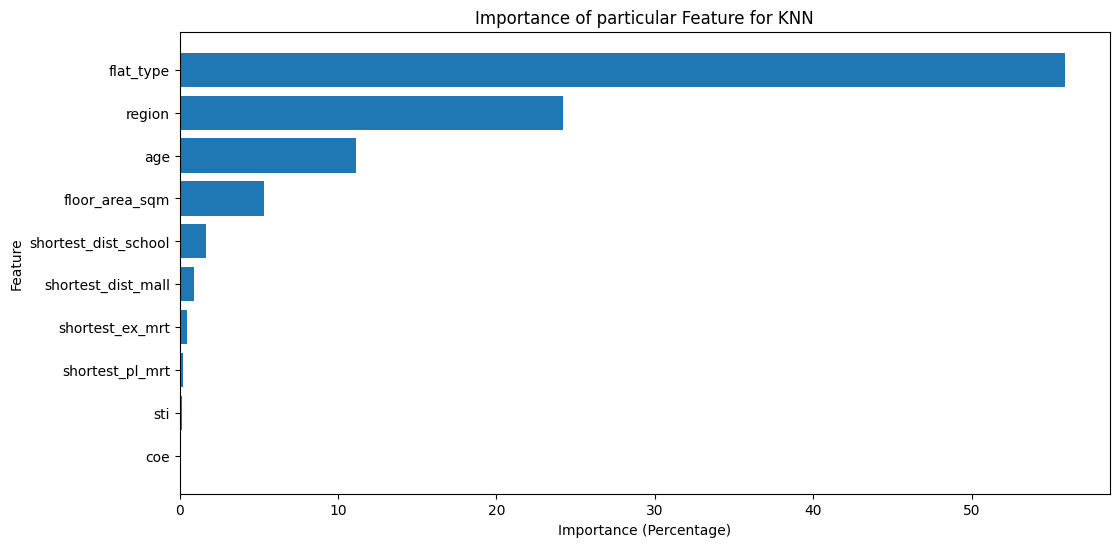

In [10]:
# KNN: Finding best features to use for KNN

# Define the list of all possible feature combinations
all_features = ['flat_type', 'region', 'age', 'floor_area_sqm', 'shortest_dist_school', 'shortest_dist_mall', 'shortest_ex_mrt', 'shortest_pl_mrt', 'sti', 'coe']
y_col = ['monthly_rent']
combinations_to_try = []
for r in range(1, len(all_features) + 1):
    combinations_to_try.extend(combinations(all_features, r))

# Define lists to store feature combinations and their corresponding RMSE
feature_combinations = []
rmse_values = []

for feature_combination in combinations_to_try:
    # Select the current feature combination
    x_col = list(feature_combination)

    # Preprocess the data
    X = housing_codes[x_col].values
    Y = housing_codes[y_col].values
    test_size = 0.20
    seed = 7
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # Feature scaling (standardization)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create a KNN model
    knn = KNeighborsRegressor(n_neighbors=25)  # You can experiment with different values of K

    # Train the KNN model
    knn.fit(X_train, Y_train)

    # Predict prices
    Y_pred = knn.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

    # Store the results
    feature_combinations.append(', '.join(x_col))
    rmse_values.append(rmse)

combined_lists = list(zip(feature_combinations, rmse_values))
combined_lists.sort(key=lambda x: x[1], reverse=True)
sorted_feature_list, sorted_list_rmse = zip(*combined_lists)

feature_importance = {feature: 0 for feature in x_col}
i=0
total_count=0
for sublist in sorted_feature_list:
    i+=0.1
    features = sublist.split(",")
    for feature in features:
        if feature in feature_importance:
            feature_importance[feature] += i
            total_count += i

for feature, count in feature_importance.items():
    feature_importance[feature] = count/total_count*100

sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))
feature_labels = list(sorted_feature_importance.keys())
importance = list(sorted_feature_importance.values())

# Create a bar chart to visualize importance of features
plt.figure(figsize=(12, 6))
plt.barh(feature_labels, importance)
plt.xlabel('Importance (Percentage)')
plt.ylabel('Feature')
plt.title('Importance of particular Feature for KNN')
plt.gca().invert_yaxis()  # Invert the y-axis to show the best results at the top
plt.show()

